<a href="https://colab.research.google.com/github/Fariha-Asif/Quarter-2-projects-PIAIC/blob/main/HelloWorld_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

package install

In [1]:
!pip install -Uq langchain langchain-google-genai
from google.colab import userdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 22.8 MB/s eta 0:00:00


In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate


In [3]:
first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "Write 5 key point about this {question}?"
)

second_prompt = PromptTemplate (
    input_variables = ["first_response"],
    template = "Write each points in detail of {first_response}?"
)

third_prompt = PromptTemplate (
    input_variables = ["second_response"],
    template = "Create an image for this {second_response}?"
)

fourth_prompt = PromptTemplate (
    input_variables = ["third_response"],
    template = "Convert this into jpg format image {third_response}?"
)

In [12]:
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model = "gemini-2.0-flash-exp",
    api_key = userdata.get('GOOGLE_API_KEY'),
    temperature = 0.7,
    max_output_token = 40
)

In [13]:
first_chain = first_prompt | llm

second_chain = second_prompt | llm

third_chain = third_prompt | llm

fourth_chain = fourth_prompt | llm

In [14]:
first_response = first_chain.invoke({"question" : input("Write an image generation prompt. ")})
print("First Chain   ", first_response.content)


Write an image generation prompt. car
First Chain    Okay, I can help with that! To give you the 5 key points, I need to know **which car** you're referring to. Please tell me the make and model of the car, or provide some details about it. 

For example, you could say:

*   "The Tesla Model 3"
*   "A 2023 Toyota Camry"
*   "A classic 1967 Ford Mustang"
*   "That new electric SUV from Kia"

Once I have that information, I can give you 5 key points about the car!



In [15]:
second_response = second_chain.invoke({"first_response" : first_response.content})
print("Second Chain  ", second_response.content)

Second Chain   Okay, let's break down each part of that response and explain in detail why it's structured the way it is:

**1. "Okay, I can help with that!"**

*   **Purpose:** This is a positive and reassuring opening. It immediately lets the user know that their request has been received and that assistance is available.
*   **Detail:** The word "Okay" is informal and friendly, setting a conversational tone. "I can help with that!" is a direct and confident statement, building trust and setting expectations. It avoids being overly formal or robotic.

**2. "To give you the 5 key points, I need to know **which car** you're referring to."**

*   **Purpose:** This clearly states the requirement for the user to provide specific information. It avoids ambiguity and explains why more information is needed.
*   **Detail:**
    *   "To give you the 5 key points" - This explicitly states the goal: to provide 5 key points. This focuses the interaction and sets a clear deliverable.
    *   "I n

In [16]:
third_response = third_chain.invoke({"second_response" : second_response.content})
print("Third Chain   ", third_response.content)

Third Chain    Okay, here are a few image concepts that aim to visually represent the text you've provided. I'll focus on capturing the key aspects of clarity, helpfulness, and the conversational flow you've described.

**Image Concept 1: The Interactive Dialogue**

*   **Visual:** A split-screen or side-by-side layout.
    *   **Left Side:** A stylized speech bubble with the text "Okay, I can help with that!".  Use a friendly font and perhaps a bright, inviting color. Maybe include a small, helpful-looking icon (like a lightbulb or a magnifying glass) nearby.
    *   **Right Side:** A larger speech bubble with the text: "To give you the 5 key points, I need to know **which car** you're referring to."  The words "**which car**" are in bold, as in the text, and perhaps in a slightly different color to draw attention. Below this, a smaller speech bubble with the text "Please tell me the make and model..." and the example list in a smaller font below that. Include an input field (like a t

In [17]:
fourth_response = fourth_chain.invoke({"third_response" : third_response.content})
print("Fourth Chain  ", fourth_response.content)

Fourth Chain   Okay, I will generate a JPG image for each of the four concepts described. Due to the limitations of this text-based interface, I cannot directly create and display images here. However, I will provide a textual description of each image that you can use as a guide, and if needed, you can use a tool like Canva, Figma, or even a simple drawing program to create the actual images.

**I will use the following consistent style for all images to ensure they are cohesive:**

*   **Color Palette:** A light blue background (#e0f7fa) with dark blue (#1a237e) and white (#ffffff) for text and elements.
*   **Font:** "Open Sans" (or a similar clean sans-serif font)
*   **Iconography:** Simple line-art style icons.

**Here are the descriptions of each image:**

**Image 1: "Interactive Dialogue.jpg"**

*   **Description:**
    *   **Layout:** Split-screen, left and right sides
    *   **Left Side:**
        *   A rounded speech bubble with a light blue background and a dark blue borde

In [18]:
from diffusers import StableDiffusionPipeline
import torch

In [19]:
print("\nGenerating the image...")

# Load the correct pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Move the pipeline to GPU if available
if torch.cuda.is_available():
    pipe = pipe.to("cuda")

# Generate the image
prompt = first_response.content
image = pipe(
    prompt,
    height=768,
    width=768,
    num_inference_steps=28,
    guidance_scale=3.5,
).images[0]

# Save the image
image.save("refined_generated_image.png")
print("Image generated and saved as `refined_generated_image.png`")



Generating the image...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['1 9 6 7 ford mustang " * " that new electric suv from kia " once i have that information , i can give you 5 key points about the car !']


  0%|          | 0/28 [00:00<?, ?it/s]

Image generated and saved as `refined_generated_image.png`


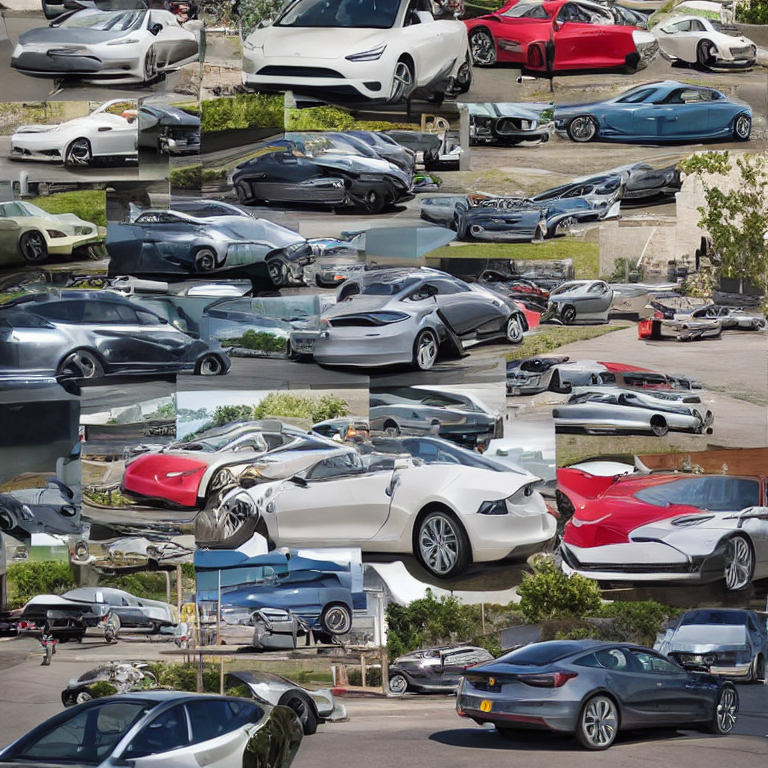

In [20]:
image